# Description

**TODO**

# Modules loading

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

from entity import Gene
import conf

# Settings

In [3]:
# OUTPUT_DIR = conf.RESULTS["DRUG_DISEASE_ANALYSES"]
# display(OUTPUT_DIR)

# assert OUTPUT_DIR.exists()
# # OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
# INPUT_DATA_DIR = Path(
#     conf.RESULTS["DRUG_DISEASE_ANALYSES"],
#     "data",
# )
# display(INPUT_DATA_DIR)

In [5]:
# OUTPUT_PREDICTIONS_DIR = Path(
#     conf.RESULTS["DRUG_DISEASE_ANALYSES"], "predictions", "dotprod_neg"
# )
# display(OUTPUT_PREDICTIONS_DIR)

# Data loading

## S-MultiXcan projection

In [6]:
# input_file = Path(
#     conf.RESULTS["PROJECTIONS_DIR"],
#     "projection-smultixcan-efo_partial-mashr-zscores.pkl",
# ).resolve()
# display(input_file)

In [7]:
# smultixcan_proj = pd.read_pickle(input_file)

In [8]:
# smultixcan_proj.shape

In [9]:
# smultixcan_proj.head()

## S-MultiXcan

In [10]:
# # smultixcan_zscores = pd.read_pickle(conf.PHENOMEXCAN["SMULTIXCAN_MASHR_ZSCORES_FILE"])
# smultixcan_zscores = pd.read_pickle(
#     conf.PHENOMEXCAN["SMULTIXCAN_EFO_PARTIAL_MASHR_ZSCORES_FILE"]
# )

In [11]:
# smultixcan_zscores = smultixcan_zscores.rename(index=Gene.GENE_ID_TO_NAME_MAP)

In [12]:
# smultixcan_zscores = smultixcan_zscores[~smultixcan_zscores.index.duplicated()]

In [13]:
# smultixcan_zscores = smultixcan_zscores.dropna(how="any")

In [14]:
# smultixcan_zscores.shape

In [15]:
# smultixcan_zscores.head()

## PharmacotherapyDB: load gold standard

### Final

In [17]:
gold_standard = pd.read_pickle(
    Path(conf.RESULTS["DRUG_DISEASE_ANALYSES"], "gold_standard.pkl"),
)

In [18]:
gold_standard.shape

(998, 3)

In [19]:
gold_standard.head()

,trait,drug,true_class
0,DOID:10652,DB00843,1
1,DOID:10652,DB00674,1
2,DOID:10652,DB01043,1
3,DOID:10652,DB00989,1
4,DOID:10652,DB00810,0


### Info

In [20]:
# TODO hardcoded
input_file = Path(
    conf.DATA_DIR, "hetionet/pharmacotherapydb-v1.0", "indications.tsv"
).resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/data/hetionet/pharmacotherapydb-v1.0/indications.tsv')

In [21]:
gold_standard_info = pd.read_csv(input_file, sep="\t")

In [22]:
gold_standard_info = gold_standard_info.rename(columns={"drug": "drug_name"})

In [23]:
gold_standard_info.shape

(1388, 7)

In [24]:
gold_standard_info.head()

,doid_id,drugbank_id,disease,drug_name,category,n_curators,n_resources
0,DOID:10652,DB00843,Alzheimer's disease,Donepezil,DM,2,1
1,DOID:10652,DB00674,Alzheimer's disease,Galantamine,DM,1,4
2,DOID:10652,DB01043,Alzheimer's disease,Memantine,DM,1,3
3,DOID:10652,DB00989,Alzheimer's disease,Rivastigmine,DM,1,3
4,DOID:10652,DB00245,Alzheimer's disease,Benzatropine,SYM,3,1


In [25]:
gold_standard_info = (
    gold_standard.set_index(["trait", "drug"])
    .join(
        gold_standard_info.rename(
            columns={"doid_id": "trait", "drugbank_id": "drug"}
        ).set_index(["trait", "drug"])
    )
    .reset_index()
)

In [26]:
gold_standard_info.shape

(998, 8)

In [27]:
gold_standard_info.head()

,trait,drug,true_class,disease,drug_name,category,n_curators,n_resources
0,DOID:10652,DB00843,1,Alzheimer's disease,Donepezil,DM,2,1
1,DOID:10652,DB00674,1,Alzheimer's disease,Galantamine,DM,1,4
2,DOID:10652,DB01043,1,Alzheimer's disease,Memantine,DM,1,3
3,DOID:10652,DB00989,1,Alzheimer's disease,Rivastigmine,DM,1,3
4,DOID:10652,DB00810,0,Alzheimer's disease,Biperiden,NOT,2,1


## LINCS data

In [28]:
input_file = Path(
    conf.RESULTS["DRUG_DISEASE_ANALYSES"], "lincs", "lincs-data.pkl"
).resolve()

display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/drug_disease_analyses/lincs/lincs-data.pkl')

In [29]:
lincs_data = pd.read_pickle(input_file).T.rename(columns=Gene.GENE_ID_TO_NAME_MAP)

In [30]:
display(lincs_data.shape)

(1170, 7120)

In [31]:
display(lincs_data.head())

,ADA,CDH2,AKT3,MED6,ACOT8,ABI1,GNPDA1,CDH3,TANK,TOPORS-AS1,...,RBX1,CDC42,THOC1,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,PTBP3,CASP8AP2
perturbagen,,,,,,,,,,,,,,,,,,,,,
DB00014,-1.001,1.146,-0.693,-0.037,0.162,-0.380,0.649,-1.952,0.294,0.274,...,-0.592,0.178,0.270,-0.013,0.351,-0.128,0.274,-0.734,-0.048,0.036
DB00091,-1.835,-1.863,1.694,0.383,-0.899,0.628,-4.878,2.527,1.709,-0.981,...,-0.668,-2.795,-0.333,-0.027,0.578,6.926,-1.875,4.382,0.266,-4.995
DB00121,1.391,0.011,-0.804,0.269,0.105,-0.588,-1.899,0.306,-1.178,0.120,...,-0.962,0.450,-0.999,1.358,-1.476,0.423,-1.356,-1.897,-0.299,-0.732
DB00130,1.132,-1.020,-0.164,-0.997,-0.090,0.195,-2.341,0.494,-0.813,-1.140,...,-0.553,-0.528,0.308,0.534,-0.320,3.001,-0.414,0.134,0.147,2.158
DB00131,0.257,1.143,1.145,0.185,-1.291,-0.457,0.038,1.442,-1.692,0.593,...,-0.556,-0.600,0.092,-0.564,0.174,-1.203,-1.080,-0.575,-0.792,-0.095


In [32]:
lincs_data.index.is_unique

True

In [33]:
lincs_data.columns.is_unique

True

## LINCS projection

In [34]:
input_file = Path(
    conf.RESULTS["DRUG_DISEASE_ANALYSES"], "lincs", "lincs-projection.pkl"
).resolve()

display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/drug_disease_analyses/lincs/lincs-projection.pkl')

In [35]:
lincs_projection = pd.read_pickle(input_file).T

In [36]:
display(lincs_projection.shape)

(1170, 987)

In [37]:
display(lincs_projection.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
perturbagen,,,,,,,,,,,,,,,,,,,,,
DB00014,0.036115,0.012281,-0.005533,-0.004151,-0.015156,-0.010861,0.008181,-0.008148,0.004948,-0.009869,...,-0.003139,0.003546,-0.006242,0.002449,-0.004391,-0.004334,-0.019902,0.004292,-0.010378,0.002000
DB00091,-0.358610,0.009738,-0.059174,-0.032884,-0.005276,0.063369,-0.079522,-0.018980,-0.025782,0.021540,...,-0.019892,0.003610,-0.016165,0.008686,0.065335,-0.042051,0.065516,0.016261,0.056314,-0.051035
DB00121,0.091067,0.004650,0.013454,0.005934,0.025747,0.004324,-0.001865,-0.019613,0.051503,0.013032,...,0.001629,-0.012565,0.009613,-0.014404,-0.009188,0.006544,0.047466,-0.016220,-0.018844,0.034675
DB00130,0.008923,-0.006554,0.008906,-0.003991,0.000346,0.008212,0.001242,-0.012771,0.014221,0.008269,...,-0.026139,-0.002977,0.021969,0.001204,-0.012731,-0.000076,-0.029127,-0.022679,0.016179,-0.003029
DB00131,0.046469,0.021758,-0.004939,-0.028524,-0.013932,0.012231,-0.001325,0.003787,0.035189,-0.004377,...,0.017373,0.005304,-0.001649,0.004017,-0.000622,-0.006477,0.021663,0.000988,0.002038,-0.011747


## MultiPLIER Z

In [38]:
multiplier_z = pd.read_pickle(conf.MULTIPLIER["MODEL_Z_MATRIX_FILE"])

In [39]:
multiplier_z.shape

(6750, 987)

In [40]:
multiplier_z.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
GAS6,0.000000,0.0,0.039438,0.0,0.050476,0.000000,0.0,0.000000,0.590949,0.000000,...,0.050125,0.00000,0.033407,0.000000,0.000000,0.005963,0.347362,0.0,0.000000,0.000000
MMP14,0.000000,0.0,0.000000,0.0,0.070072,0.000000,0.0,0.004904,1.720179,2.423595,...,0.000000,0.00000,0.001007,0.000000,0.035747,0.000000,0.000000,0.0,0.014978,0.000000
DSP,0.000000,0.0,0.000000,0.0,0.000000,0.041697,0.0,0.005718,0.000000,0.000000,...,0.020853,0.00000,0.000000,0.000000,0.000000,0.005774,0.000000,0.0,0.000000,0.416405
MARCKSL1,0.305212,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.161843,0.149471,...,0.027134,0.05272,0.000000,0.030189,0.060884,0.000000,0.000000,0.0,0.000000,0.448480
SPARC,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.014014,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.067779,0.0,0.122417,0.062665


## Prediction results

### Full

In [41]:
output_file = Path(
    conf.RESULTS["DRUG_DISEASE_ANALYSES"],
    "lincs",
    "predictions",
    "predictions_results.pkl",
).resolve()
display(output_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/drug_disease_analyses/lincs/predictions/predictions_results.pkl')

In [42]:
predictions = pd.read_pickle(output_file)

In [43]:
predictions.shape

(316540, 8)

In [44]:
predictions.head()

,trait,drug,score,true_class,method,n_top_genes,data,tissue
0,DOID:0050741,DB00215,323.0,1,Gene-based,100.0,spredixcan-mashr-zscores-Pancreas-data,Pancreas
1,DOID:0050741,DB00704,230.0,1,Gene-based,100.0,spredixcan-mashr-zscores-Pancreas-data,Pancreas
2,DOID:0050741,DB00822,199.0,1,Gene-based,100.0,spredixcan-mashr-zscores-Pancreas-data,Pancreas
3,DOID:10283,DB00014,115.0,1,Gene-based,100.0,spredixcan-mashr-zscores-Pancreas-data,Pancreas
4,DOID:10283,DB00175,167.0,0,Gene-based,100.0,spredixcan-mashr-zscores-Pancreas-data,Pancreas


In [45]:
def _reduce_mean(x):
    return pd.Series(
        {"score": x["score"].mean(), "true_class": x["true_class"].unique()[0]}
    )

In [46]:
predictions_by_tissue = (
    predictions.groupby(["trait", "drug", "method", "tissue"])
    .apply(_reduce_mean)
    .dropna()
    .sort_index()
    .reset_index()
)

In [47]:
predictions_by_tissue.head()

,trait,drug,method,tissue,score,true_class
0,DOID:0050741,DB00215,Gene-based,Adipose_Subcutaneous,168.6,1.0
1,DOID:0050741,DB00215,Gene-based,Adipose_Visceral_Omentum,171.2,1.0
2,DOID:0050741,DB00215,Gene-based,Adrenal_Gland,82.0,1.0
3,DOID:0050741,DB00215,Gene-based,Artery_Aorta,65.2,1.0
4,DOID:0050741,DB00215,Gene-based,Artery_Coronary,109.4,1.0


### Aggregated

In [48]:
output_file = Path(
    conf.RESULTS["DRUG_DISEASE_ANALYSES"],
    "lincs",
    "predictions",
    "predictions_results_aggregated.pkl",
).resolve()
display(output_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/drug_disease_analyses/lincs/predictions/predictions_results_aggregated.pkl')

In [49]:
predictions_avg = pd.read_pickle(output_file)

In [50]:
predictions_avg.shape

(1292, 5)

In [51]:
predictions_avg.head()

,trait,drug,method,score,true_class
0,DOID:0050741,DB00215,Gene-based,359.0,1.0
1,DOID:0050741,DB00215,Module-based,437.8,1.0
2,DOID:0050741,DB00704,Gene-based,395.8,1.0
3,DOID:0050741,DB00704,Module-based,562.8,1.0
4,DOID:0050741,DB00822,Gene-based,556.8,1.0


### Merge

In [52]:
pharmadb_predictions = pd.merge(
    gold_standard_info,
    predictions_avg,
    #     left_on=["doid_id", "drugbank_id"],
    on=["trait", "drug"],
    how="inner",
)

In [53]:
pharmadb_predictions

,trait,drug,true_class_x,disease,drug_name,category,n_curators,n_resources,method,score,true_class_y
0,DOID:10652,DB00843,1,Alzheimer's disease,Donepezil,DM,2,1,Gene-based,311.6,1.0
1,DOID:10652,DB00843,1,Alzheimer's disease,Donepezil,DM,2,1,Module-based,475.2,1.0
2,DOID:10652,DB00674,1,Alzheimer's disease,Galantamine,DM,1,4,Gene-based,509.4,1.0
3,DOID:10652,DB00674,1,Alzheimer's disease,Galantamine,DM,1,4,Module-based,508.0,1.0
4,DOID:10652,DB01043,1,Alzheimer's disease,Memantine,DM,1,3,Gene-based,452.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1287,DOID:363,DB00917,0,uterine cancer,Dinoprostone,NOT,3,1,Module-based,476.0,0.0
1288,DOID:363,DB00783,0,uterine cancer,Estradiol,NOT,2,1,Gene-based,556.0,0.0
1289,DOID:363,DB00783,0,uterine cancer,Estradiol,NOT,2,1,Module-based,603.0,0.0
1290,DOID:12306,DB00553,1,vitiligo,Methoxsalen,DM,3,1,Gene-based,550.8,1.0


In [54]:
pharmadb_predictions = pharmadb_predictions[
    ["trait", "drug", "disease", "drug_name", "method", "score", "true_class_x"]
].rename(columns={"true_class_x": "true_class", "drug_x": "drug"})

In [55]:
display(pharmadb_predictions.shape)
assert pharmadb_predictions.shape[0] == predictions_avg.shape[0]

(1292, 7)

In [56]:
pharmadb_predictions.head()

,trait,drug,disease,drug_name,method,score,true_class
0,DOID:10652,DB00843,Alzheimer's disease,Donepezil,Gene-based,311.6,1
1,DOID:10652,DB00843,Alzheimer's disease,Donepezil,Module-based,475.2,1
2,DOID:10652,DB00674,Alzheimer's disease,Galantamine,Gene-based,509.4,1
3,DOID:10652,DB00674,Alzheimer's disease,Galantamine,Module-based,508.0,1
4,DOID:10652,DB01043,Alzheimer's disease,Memantine,Gene-based,452.4,1


In [57]:
pharmadb_predictions["trait"].unique().shape

(53,)

In [58]:
pharmadb_predictions["drug"].unique().shape

(322,)

In [59]:
data_stats = pharmadb_predictions.groupby("method")["score"].describe()
display(data_stats)

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Gene-based,646.0,517.657585,93.950154,87.3,458.95,535.4,591.75,646.0
Module-based,646.0,530.429721,73.472425,220.4,484.10,535.0,587.90,646.0


In [60]:
# Standardize scores by method
def _standardize(x):
    return (x["score"] - data_stats.loc[x["method"], "mean"]) / data_stats.loc[
        x["method"], "std"
    ]

In [61]:
pharmadb_predictions = pharmadb_predictions.assign(
    score_std=pharmadb_predictions.apply(_standardize, axis=1)
)

In [62]:
pharmadb_predictions

,trait,drug,disease,drug_name,method,score,true_class,score_std
0,DOID:10652,DB00843,Alzheimer's disease,Donepezil,Gene-based,311.6,1,-2.193265
1,DOID:10652,DB00843,Alzheimer's disease,Donepezil,Module-based,475.2,1,-0.751707
2,DOID:10652,DB00674,Alzheimer's disease,Galantamine,Gene-based,509.4,1,-0.087893
3,DOID:10652,DB00674,Alzheimer's disease,Galantamine,Module-based,508.0,1,-0.305281
4,DOID:10652,DB01043,Alzheimer's disease,Memantine,Gene-based,452.4,1,-0.694598
...,...,...,...,...,...,...,...,...
1287,DOID:363,DB00917,uterine cancer,Dinoprostone,Module-based,476.0,0,-0.740818
1288,DOID:363,DB00783,uterine cancer,Estradiol,Gene-based,556.0,0,0.408114
1289,DOID:363,DB00783,uterine cancer,Estradiol,Module-based,603.0,0,0.987721
1290,DOID:12306,DB00553,vitiligo,Methoxsalen,Gene-based,550.8,1,0.352766


### Testing

In [63]:
_tmp = pharmadb_predictions.groupby("method")[["score", "score_std"]].describe()
display(_tmp)

score                                                       \
              count        mean        std    min     25%    50%     75%   
method                                                                     
Gene-based    646.0  517.657585  93.950154   87.3  458.95  535.4  591.75   
Module-based  646.0  530.429721  73.472425  220.4  484.10  535.0  587.90   

                    score_std                                         \
                max     count          mean  std       min       25%   
method                                                                 
Gene-based    646.0     646.0 -5.609548e-16  1.0 -4.580701 -0.624880   
Module-based  646.0     646.0  2.034836e-16  1.0 -4.219675 -0.630573   

                                            
                   50%       75%       max  
method                                      
Gene-based    0.188849  0.788635  1.366069  
Module-based  0.062204  0.782202  1.572975

In [64]:
_tmp0 = pharmadb_predictions[(pharmadb_predictions["method"] == "Gene-based")][
    ["score", "score_std"]
]

In [65]:
assert all(_tmp0.corr() > 0.99999)

In [66]:
_tmp0 = pharmadb_predictions[(pharmadb_predictions["method"] == "Module-based")][
    ["score", "score_std"]
]

In [67]:
assert all(_tmp0.corr() > 0.99999)

# List diseases

In [68]:
pharmadb_predictions["disease"].unique()

array(["Alzheimer's disease", "Crohn's disease", "Parkinson's disease",
       'alcohol dependence', 'allergic rhinitis', 'anemia',
       'ankylosing spondylitis', 'asthma', 'atherosclerosis',
       'bone cancer', 'brain cancer', 'breast cancer', 'cervical cancer',
       'chronic kidney failure', 'chronic obstructive pulmonary disease',
       'coronary artery disease', 'epilepsy syndrome',
       'esophageal cancer', 'gestational diabetes', 'glaucoma', 'gout',
       'hematologic cancer', 'hypertension', 'hypothyroidism',
       'kidney cancer', 'liver cancer', 'lung cancer', 'malaria',
       'melanoma', 'migraine', 'multiple sclerosis', 'nephrolithiasis',
       'obesity', 'osteoarthritis', 'osteoporosis', 'pancreatic cancer',
       'pancreatitis', 'periodontitis', 'prostate cancer', 'psoriasis',
       'psoriatic arthritis', 'rheumatoid arthritis', 'skin cancer',
       'stomach cancer', 'systemic lupus erythematosus',
       'testicular cancer', 'thyroid cancer', 'type 1 diabe

# Looks for differences in scores of both methods

In [69]:
np.all(pharmadb_predictions.groupby(["trait", "drug"]).count() == 2)

True

In [70]:
def _compare(x):
    assert x.shape[0] == 2
    x_sign = np.sign(x["score_std"].values)
    x0 = x.iloc[0]["score_std"]
    x1 = x.iloc[1]["score_std"]

    return pd.Series(
        {"different_sign": x_sign[0] != x_sign[1], "score_difference": np.abs(x0 - x1)}
    )

In [71]:
pharmadb_predictions = pharmadb_predictions.set_index(["trait", "drug"]).join(
    pharmadb_predictions.groupby(["trait", "drug"]).apply(_compare)
)

In [72]:
pharmadb_predictions.head()

disease   drug_name        method  score  \
trait        drug                                                           
DOID:0050741 DB00215  alcohol dependence  Citalopram    Gene-based  359.0   
             DB00215  alcohol dependence  Citalopram  Module-based  437.8   
             DB00704  alcohol dependence  Naltrexone    Gene-based  395.8   
             DB00704  alcohol dependence  Naltrexone  Module-based  562.8   
             DB00822  alcohol dependence  Disulfiram    Gene-based  556.8   

                      true_class  score_std  different_sign  score_difference  
trait        drug                                                              
DOID:0050741 DB00215           1  -1.688742           False          0.428001  
             DB00215           1  -1.260741           False          0.428001  
             DB00704           1  -1.297045            True          1.737622  
             DB00704           1   0.440577            True          1.737622  
             DB00822           1   0.416630           False          0.508483

In [73]:
def find_differences(trait_name):
    with pd.option_context(
        "display.max_rows", None, "display.max_columns", None, "max_colwidth", None
    ):
        _tmp = pharmadb_predictions[
            (pharmadb_predictions["disease"] == trait_name)
            & (pharmadb_predictions["different_sign"])
        ].sort_values(
            ["score_difference", "drug_name", "method"], ascending=[False, False, False]
        )
        display(_tmp)

## any disease

In [74]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "max_colwidth", None
):
    _tmp = pharmadb_predictions[
        (pharmadb_predictions["different_sign"])
        & (~pharmadb_predictions["disease"].str.contains("cancer"))  # avoid cancer
    ].sort_values(
        ["score_difference", "drug_name", "method"], ascending=[False, False, False]
    )
    display(_tmp.head(50))

disease            drug_name  \
trait        drug                                                     
DOID:10763   DB01136              hypertension           Carvedilol   
             DB01136              hypertension           Carvedilol   
DOID:4481    DB00959         allergic rhinitis   Methylprednisolone   
             DB00959         allergic rhinitis   Methylprednisolone   
             DB01234         allergic rhinitis        Dexamethasone   
             DB01234         allergic rhinitis        Dexamethasone   
             DB00443         allergic rhinitis        Betamethasone   
             DB00443         allergic rhinitis        Betamethasone   
DOID:10763   DB00374              hypertension         Treprostinil   
             DB00374              hypertension         Treprostinil   
             DB00384              hypertension          Triamterene   
             DB00384              hypertension          Triamterene   
             DB00966              hypertension          Telmisartan   
             DB00966              hypertension          Telmisartan   
             DB01001              hypertension           Salbutamol   
             DB01001              hypertension           Salbutamol   
DOID:7147    DB00620    ankylosing spondylitis        Triamcinolone   
             DB00620    ankylosing spondylitis        Triamcinolone   
DOID:10763   DB00227              hypertension           Lovastatin   
             DB00227              hypertension           Lovastatin   
             DB00820              hypertension            Tadalafil   
             DB00820              hypertension            Tadalafil   
             DB00598              hypertension            Labetalol   
             DB00598              hypertension            Labetalol   
             DB00905              hypertension          Bimatoprost   
             DB00905              hypertension          Bimatoprost   
             DB00774              hypertension   Hydroflumethiazide   
             DB00774              hypertension   Hydroflumethiazide   
DOID:4481    DB00741         allergic rhinitis       Hydrocortisone   
             DB00741         allergic rhinitis       Hydrocortisone   
DOID:2841    DB00938                    asthma           Salmeterol   
             DB00938                    asthma           Salmeterol   
DOID:8893    DB01091                 psoriasis           Butenafine   
             DB01091                 psoriasis           Butenafine   
DOID:4481    DB00620         allergic rhinitis        Triamcinolone   
             DB00620         allergic rhinitis        Triamcinolone   
DOID:10763   DB00436              hypertension  Bendroflumethiazide   
             DB00436              hypertension  Bendroflumethiazide   
             DB00758              hypertension          Clopidogrel   
             DB00758              hypertension          Clopidogrel   
DOID:9352    DB01200  type 2 diabetes mellitus        Bromocriptine   
             DB01200  type 2 diabetes mellitus        Bromocriptine   
DOID:10763   DB01194              hypertension         Brinzolamide   
             DB01194              hypertension         Brinzolamide   
DOID:0050741 DB00704        alcohol dependence           Naltrexone   
             DB00704        alcohol dependence           Naltrexone   
DOID:13189   DB01394                      gout           Colchicine   
             DB01394                      gout           Colchicine   
DOID:2841    DB00535                    asthma             Cefdinir   
             DB00535                    asthma             Cefdinir   

                            method  score  true_class  score_std  \
trait        drug                                                  
DOID:10763   DB01136  Module-based  289.2           1  -3.283269   
             DB01136    Gene-based  551.6           1   0.361281   
DOID:4481    DB00959  Module-based  538.4           1   0.108480   
      

## coronary artery disease

In [75]:
find_differences("coronary artery disease")

disease        drug_name        method  \
trait     drug                                                              
DOID:3393 DB01197  coronary artery disease        Captopril  Module-based   
          DB01197  coronary artery disease        Captopril    Gene-based   
          DB00451  coronary artery disease    Levothyroxine  Module-based   
          DB00451  coronary artery disease    Levothyroxine    Gene-based   
          DB00509  coronary artery disease  Dextrothyroxine  Module-based   
          DB00509  coronary artery disease  Dextrothyroxine    Gene-based   
          DB00700  coronary artery disease       Eplerenone  Module-based   
          DB00700  coronary artery disease       Eplerenone    Gene-based   
          DB00790  coronary artery disease      Perindopril  Module-based   
          DB00790  coronary artery disease      Perindopril    Gene-based   
          DB01039  coronary artery disease      Fenofibrate  Module-based   
          DB01039  coronary artery disease      Fenofibrate    Gene-based   

                   score  true_class  score_std  different_sign  \
trait     drug                                                    
DOID:3393 DB01197  580.2           1   0.677401            True   
          DB01197  448.0           1  -0.741431            True   
          DB00451  483.5           0  -0.638739            True   
          DB00451  551.3           0   0.358088            True   
          DB00509  483.5           0  -0.638739            True   
          DB00509  551.3           0   0.358088            True   
          DB00700  538.6           1   0.111202            True   
          DB00700  437.2           1  -0.856386            True   
          DB00790  555.8           1   0.345303            True   
          DB00790  498.0           1  -0.209234            True   
          DB01039  533.6           1   0.043149            True   
          DB01039  497.4           1  -0.215621            True   

                   score_difference  
trait     drug                       
DOID:3393 DB01197          1.418832  
          DB01197          1.418832  
          DB00451          0.996827  
          DB00451          0.996827  
          DB00509          0.996827  
          DB00509          0.996827  
          DB00700          0.967588  
          DB00700          0.967588  
          DB00790          0.554538  
          DB00790          0.554538  
          DB01039          0.258770  
          DB01039          0.258770

## atherosclerosis

In [76]:
find_differences("atherosclerosis")

disease    drug_name        method  score  \
trait     drug                                                         
DOID:1936 DB00227  atherosclerosis   Lovastatin  Module-based  439.0   
          DB00227  atherosclerosis   Lovastatin    Gene-based  553.8   
          DB00175  atherosclerosis  Pravastatin  Module-based  470.0   
          DB00175  atherosclerosis  Pravastatin    Gene-based  534.4   
          DB00758  atherosclerosis  Clopidogrel  Module-based  503.2   
          DB00758  atherosclerosis  Clopidogrel    Gene-based  569.4   
          DB00627  atherosclerosis       Niacin  Module-based  568.6   
          DB00627  atherosclerosis       Niacin    Gene-based  516.6   

                   true_class  score_std  different_sign  score_difference  
trait     drug                                                              
DOID:1936 DB00227           1  -1.244409            True          1.629106  
          DB00227           1   0.384698            True          1.629106  
          DB00175           1  -0.822482            True          1.000687  
          DB00175           1   0.178205            True          1.000687  
          DB00758           0  -0.370611            True          0.921355  
          DB00758           0   0.550743            True          0.921355  
          DB00627           1   0.519518            True          0.530775  
          DB00627           1  -0.011257            True          0.530775

# Niacin and Atherosclerosis

In [77]:
from entity import Trait

In [78]:
Trait.get_traits_from_efo("atherosclerosis")

[I70-Diagnoses_main_ICD10_I70_Atherosclerosis]

In [79]:
d = Trait.get_trait(full_code="I70-Diagnoses_main_ICD10_I70_Atherosclerosis")

In [80]:
d.n, d.n_cases

(361194, 566.0)

In [112]:
Trait.get_traits_from_efo("coronary artery disease")

[I25-Diagnoses_main_ICD10_I25_Chronic_ischaemic_heart_disease,
 CARDIoGRAM_C4D_CAD_ADDITIVE]

In [117]:
d = Trait.get_trait(full_code="CARDIoGRAM_C4D_CAD_ADDITIVE")
# d = Trait.get_trait(full_code="I25-Diagnoses_main_ICD10_I25_Chronic_ischaemic_heart_disease")

In [118]:
d.n, d.n_cases

(184305, 60801.0)

In [119]:
_doid = "DOID:1936"
_phenomexcan_traits = ["I70-Diagnoses_main_ICD10_I70_Atherosclerosis", "CARDIoGRAM_C4D_CAD_ADDITIVE"]

# _doid = "DOID:3393"
# _phenomexcan_traits = [
#     "I25-Diagnoses_main_ICD10_I25_Chronic_ischaemic_heart_disease",
#     "CARDIoGRAM_C4D_CAD_ADDITIVE"
# ]

_drug_id = "DB00627"
_drug_name = "Niacin"

In [120]:
pharmadb_predictions[pharmadb_predictions["drug_name"] == _drug_name].sort_values(
    ["disease", "method"]
)

disease drug_name        method  score  \
trait     drug                                                              
DOID:1936 DB00627          atherosclerosis    Niacin    Gene-based  516.6   
          DB00627          atherosclerosis    Niacin  Module-based  568.6   
DOID:3393 DB00627  coronary artery disease    Niacin    Gene-based  565.4   
          DB00627  coronary artery disease    Niacin  Module-based  601.0   
DOID:4989 DB00627             pancreatitis    Niacin    Gene-based  394.8   
          DB00627             pancreatitis    Niacin  Module-based  518.8   

                   true_class  score_std  different_sign  score_difference  
trait     drug                                                              
DOID:1936 DB00627           1  -0.011257            True          0.530775  
          DB00627           1   0.519518            True          0.530775  
DOID:3393 DB00627           1   0.508167           False          0.452333  
          DB00627           1   0.960500           False          0.452333  
DOID:4989 DB00627           0  -1.307689           False          1.149402  
          DB00627           0  -0.158287           False          1.149402

In [121]:
predictions_avg[
    (predictions_avg["trait"] == _doid) & (predictions_avg["drug"] == _drug_id)
]

,trait,drug,method,score,true_class
588,DOID:1936,DB00627,Gene-based,516.6,1.0
589,DOID:1936,DB00627,Module-based,568.6,1.0


In [135]:
predictions_by_tissue

,trait,drug,method,tissue,score,true_class
0,DOID:0050741,DB00215,Gene-based,Adipose_Subcutaneous,168.6,1.0
1,DOID:0050741,DB00215,Gene-based,Adipose_Visceral_Omentum,171.2,1.0
2,DOID:0050741,DB00215,Gene-based,Adrenal_Gland,82.0,1.0
3,DOID:0050741,DB00215,Gene-based,Artery_Aorta,65.2,1.0
4,DOID:0050741,DB00215,Gene-based,Artery_Coronary,109.4,1.0
...,...,...,...,...,...,...
63303,DOID:9970,DB01156,Module-based,Testis,410.6,1.0
63304,DOID:9970,DB01156,Module-based,Thyroid,124.0,1.0
63305,DOID:9970,DB01156,Module-based,Uterus,260.2,1.0
63306,DOID:9970,DB01156,Module-based,Vagina,363.8,1.0


In [137]:
Trait.get_trait("CARDIoGRAM_C4D_CAD_ADDITIVE").get_do_info()

EfoInfo(id=['DOID:3393'], label=None)

In [123]:
def find_best_tissue(trait_id, drug_id):
    THERE IS A BUG IN THIS FUNCTION, NOT USING PARAMETERS
    SEE NOTEBOOK 040 FOR THE FIX
    
    _tmp = (
        predictions_by_tissue[
            (predictions_by_tissue["trait"] == _doid)
            & (predictions_by_tissue["drug"] == _drug_id)
        ]
        .groupby("method")["score"]
        .idxmax()
    )
    
    _tmp = predictions_by_tissue.loc[_tmp.values][["method", "tissue"]].set_index(
        "method"
    )
    
    _gene_based_tissue = _tmp.loc["Gene-based", "tissue"]
    _module_tissue = _tmp.loc["Module-based", "tissue"]
    
    return _module_tissue, _gene_based_tissue

In [127]:
_tmp_res = find_best_tissue(_doid, _drug_id)
display("Module-based, gene_based:")
display(_tmp_res)

'Module-based, gene_based:'

('Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes')

In [128]:
# atherosclerosis
_tmp_res = find_best_tissue("DOID:1936", _drug_id)
display("Module-based, gene_based:")
display(_tmp_res)

'Module-based, gene_based:'

('Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes')

In [129]:
# coronary artery disease
_tmp_res = find_best_tissue("DOID:3393", _drug_id)
display("Module-based, gene_based:")
display(_tmp_res)

'Module-based, gene_based:'

('Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes')

## Gene module-based - LVs driving association

In [152]:
available_doids = set(predictions_by_tissue["trait"].unique())
traits_lv_data = []

for trait in _phenomexcan_traits:
    t = Trait.get_trait(full_code=trait)
    t_doid = t.get_do_info().id
    
    # select available doid
    t_doid = [x for x in t_doid if x in available_doids]
    assert len(t_doid) == 1
    t_doid = t_doid[0]
    display(t_doid)
    
    best_module_tissue = find_best_tissue(t_doid, _drug_id)[0]
    display(best_module_tissue)
    best_module_tissue_data = pd.read_pickle(
        conf.RESULTS["DRUG_DISEASE_ANALYSES"]
        / "spredixcan"
        / "proj"
        / f"spredixcan-mashr-zscores-{best_module_tissue}-projection.pkl"
    )[trait]
#     display(best_module_tissue_data.head())
    traits_lv_data.append(best_module_tissue_data)

'DOID:1936'

'Cells_Cultured_fibroblasts'

'DOID:3393'

'Cells_Cultured_fibroblasts'

In [153]:
module_tissue_data = pd.DataFrame(traits_lv_data).T

In [154]:
module_tissue_data.shape

(987, 2)

In [155]:
module_tissue_data.head()

,I70-Diagnoses_main_ICD10_I70_Atherosclerosis,CARDIoGRAM_C4D_CAD_ADDITIVE
LV1,0.005720,0.017756
LV2,-0.002927,-0.019637
LV3,0.002734,-0.033174
LV4,0.015454,-0.010709
LV5,0.027796,-0.003907


In [158]:
drug_data = lincs_projection.loc[_drug_id]

In [159]:
drug_data

LV1     -0.032338
LV2      0.007960
LV3      0.009136
LV4     -0.005717
LV5     -0.023626
           ...   
LV983    0.005209
LV984    0.021905
LV985    0.013012
LV986   -0.014168
LV987    0.012947
Name: DB00627, Length: 987, dtype: float64

In [197]:
module_tissue_data.iloc[:,0].sort_values().head(20)

LV329   -0.084602
LV318   -0.073914
LV802   -0.071899
LV377   -0.068738
LV220   -0.068666
LV21    -0.068623
LV463   -0.068265
LV703   -0.066833
LV116   -0.063346
LV885   -0.061459
LV599   -0.061284
LV868   -0.060959
LV340   -0.059597
LV671   -0.058340
LV439   -0.058292
LV514   -0.058132
LV496   -0.057127
LV497   -0.056895
LV402   -0.056301
LV473   -0.055935
Name: I70-Diagnoses_main_ICD10_I70_Atherosclerosis, dtype: float64

In [198]:
module_tissue_data.iloc[:,1].sort_values().head(20)

LV982   -0.112226
LV637   -0.098488
LV677   -0.094588
LV168   -0.088578
LV704   -0.087757
LV580   -0.081301
LV174   -0.077867
LV582   -0.076099
LV731   -0.074718
LV786   -0.073220
LV302   -0.073199
LV408   -0.071310
LV419   -0.070149
LV914   -0.068987
LV671   -0.068669
LV590   -0.068506
LV664   -0.068130
LV114   -0.066508
LV136   -0.065278
LV821   -0.065193
Name: CARDIoGRAM_C4D_CAD_ADDITIVE, dtype: float64

In [167]:
_tmp = (-1.0 * drug_data.dot(module_tissue_data)).sort_values(
    ascending=False
)
display(_tmp)

I70-Diagnoses_main_ICD10_I70_Atherosclerosis    0.02300
CARDIoGRAM_C4D_CAD_ADDITIVE                     0.01478
Name: DB00627, dtype: float64

In [192]:
_tmp = pd.DataFrame(
    drug_data.to_frame().values * module_tissue_data.values,
    columns=module_tissue_data.columns.copy(),
    index=drug_data.index.copy()
)

In [201]:
_tmp.sort_values("I70-Diagnoses_main_ICD10_I70_Atherosclerosis", ascending=True).head(20)

,I70-Diagnoses_main_ICD10_I70_Atherosclerosis,CARDIoGRAM_C4D_CAD_ADDITIVE
LV116,-0.006180,-0.003446
LV931,-0.004843,-0.000050
LV744,-0.002292,-0.000095
LV697,-0.002231,-0.000135
LV885,-0.001984,0.000858
LV536,-0.001956,-0.005416
LV550,-0.001933,-0.000965
LV220,-0.001822,0.000102
LV272,-0.001785,-0.001966
LV739,-0.001770,0.000273


In [202]:
_tmp.sort_values("CARDIoGRAM_C4D_CAD_ADDITIVE", ascending=True).head(20)

,I70-Diagnoses_main_ICD10_I70_Atherosclerosis,CARDIoGRAM_C4D_CAD_ADDITIVE
LV536,-0.001956,-0.005416
LV881,-0.000387,-0.004927
LV116,-0.006180,-0.003446
LV38,-0.000357,-0.002761
LV969,-0.000292,-0.002336
LV905,0.000263,-0.002124
LV840,-0.001285,-0.002121
LV272,-0.001785,-0.001966
LV879,-0.000733,-0.001903
LV161,0.000269,-0.001791


In [ ]:
ME QUEDE MIRANDO LOS DATAFRAMES DE ARRIBA Y DIJE "TENGO QUE SEGUIR CON EL K99"

In [108]:
top_lvs = _tmp.head(20)
display(top_lvs)

LV116   -0.006180
LV931   -0.004843
LV744   -0.002292
LV697   -0.002231
LV885   -0.001984
LV536   -0.001956
LV550   -0.001933
LV220   -0.001822
LV272   -0.001785
LV739   -0.001770
LV678   -0.001525
LV470   -0.001444
LV66    -0.001375
LV189   -0.001371
LV517   -0.001296
LV840   -0.001285
LV246   -0.001253
LV502   -0.001249
LV525   -0.001227
LV85    -0.001220
dtype: float64

In [ ]:
pd.DataFrame({
    "lv": top_lvs.index,
    "lv_score": top_lvs.values,
    "trait_name": ""
})

In [95]:
import seaborn as sns
sns.set_theme(style="ticks")
exercise = sns.load_dataset("exercise")

array([55, 36, 16, 71, 20, 80, 10, 14, 34, 41])

In [105]:
_idx = np.random.randint(0, 90, 10)
exercise.loc[_idx, "pulse"] = exercise.loc[_idx, "pulse"] * -1

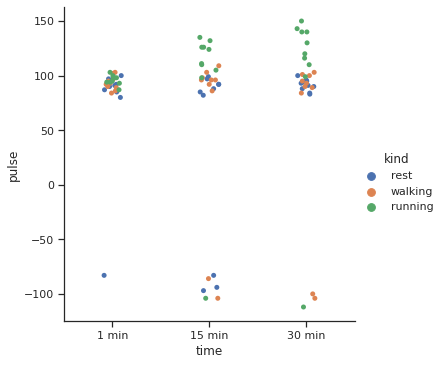

In [106]:
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)